In [2]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
nside = 2**2
#print(nside)

c1: A lensed CMB realisation is computed using Taylens, a code to compute a lensed CMB realisation using nearest-neighbour Taylor interpolation (taylens; Naess, S. K. and Louis, T. JCAP 09 001, 2013, astro-ph/1307.0719). This code takes, as an input, a set of unlensed Cl’s generated using CAMB. The params.ini is in the Ancillary directory.

In [5]:
CMB = pysm3.Sky(nside, preset_strings=["c1"])
Synch = pysm3.Sky(nside, preset_strings=["s1"])

In [6]:
CMB.components, Synch.components

([<pysm3.models.cmb.CMBLensed at 0x156ad4220>],
 [<pysm3.models.power_law.PowerLaw at 0x111e08460>])

In [7]:
map_CMB_140GHz = CMB.get_emission(140 * u.GHz)
map_Synch_40GHz = Synch.get_emission(40 * u.GHz)
map_Synch_140GHz = Synch.get_emission(140 * u.GHz)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
map_CMB_140GHz = map_CMB_140GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz))
map_Synch_40GHz = map_Synch_40GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(40*u.GHz))
map_Synch_140GHz = map_Synch_140GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz))

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#hp.mollview(map_CMB_140GHz[0], title=" map", unit = map_CMB_140GHz.unit)
#hp.mollview(map_Synch_40GHz[2], title=" map", unit = map_Synch_40GHz.unit)
#hp.mollview(map_Synch_140GHz[0], title=" map", unit = map_Synch_140GHz.unit)

## Clean MAP

In [11]:
#nside = 2**4

N_pix = hp.nside2npix(nside)

## $\vec{m} = ({[Q,U]_{\nu_1}(\hat{n}_i)},...,{[Q,U]_{\nu_{Nfreq}}(\hat{n}_{i})})$

In [12]:
# Data m

data_m = pysm3.Sky(nside, preset_strings=["c1","s1"])

## $\vec{m}$ for each channel

In [13]:
m_40GHz = data_m.get_emission(40 * u.GHz)
m_140GHz = data_m.get_emission(140 * u.GHz)
m_50GHz = data_m.get_emission(50 * u.GHz)
m_100GHz = data_m.get_emission(100 * u.GHz)

# μK_R to μK_CMB

m_40GHz = m_40GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(40*u.GHz))
m_140GHz = m_140GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz))
m_50GHz = m_50GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(50*u.GHz))
m_100GHz = m_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))

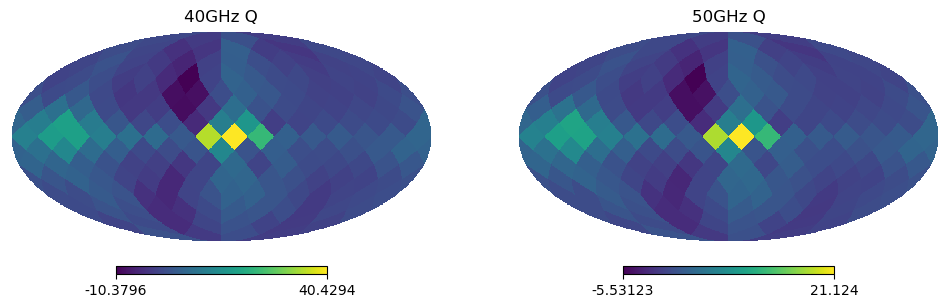

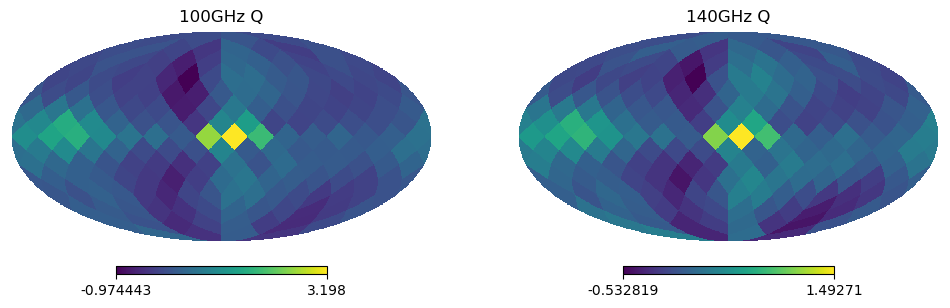

In [14]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(m_40GHz[1], title="40GHz Q", hold=True)

plt.axes(ax2)
hp.mollview(m_50GHz[1], title="50GHz Q", hold=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(m_100GHz[1], title="100GHz Q",hold=True)

plt.axes(ax2)
hp.mollview(m_140GHz[1], title="140GHz Q",hold=True)

## Q, U of m for each channel

In [15]:
m_40GHz_Q = m_40GHz[1]
m_50GHz_Q = m_50GHz[1]
m_100GHz_Q = m_100GHz[1]
m_140GHz_Q = m_140GHz[1]


m_40GHz_U = m_40GHz[2]
m_50GHz_U = m_50GHz[2]
m_100GHz_U = m_100GHz[2]
m_140GHz_U = m_140GHz[2]

##### $\vec{m} = [[Q,U]_{40GHz}(\hat{n}_{i}),[Q,U]_{100GHz}(\hat{n}_{i}),[Q,U]_{140GHz}(\hat{n}_{i})]^T$

In [16]:
data_m = np.concatenate((m_40GHz_Q, m_40GHz_U, m_100GHz_Q ,m_100GHz_U, m_140GHz_Q ,m_140GHz_U), axis=0).T

#print(len(data_m))
data_m

<Quantity [-1.53361015,  0.61409644, -1.2291789 , ..., -0.21393773,
            0.35686476, -0.28576625] uK_CMB>

#### $\boldsymbol{D}=[\boldsymbol{D}^{CMB},\boldsymbol{D}^{synch}(\bar{\beta}),\boldsymbol{D}^{synch}_{,1}]$

<img src="D_1.png" width="450"><img src="D.png" width="450">

## D elements

### $\nu_{b*} = 23$ GHz, $\beta_s = -3.0$

In [17]:
def D_element(freq, freq_b = 23 * 10**9, beta = -3.):

    # x = (f / T) * (h / k)
    x = (freq / 2.725) / (2.083661912 * 10**10)
    
    g_freq = ((np.exp(x) - 1)**2) / (np.exp(x) * x**2) * 1000.0

    
    d = g_freq * (freq/freq_b)**(beta)

    dd = g_freq * (freq/freq_b)**(beta) * np.log(freq/freq_b)
    
    return d, dd

# freq_b = 23 GHz, beta = -3.0
d_40, dd_40 = D_element(40 * 10**9)
d_50, dd_50 = D_element(50 * 10**9)
d_100, dd_100 = D_element(100 * 10**9)
d_140, dd_140 = D_element(140 * 10**9)

"""
d_40, dd_40 = D_element(40 * 10**9, 23 * 10**9, -3.0)
d_50, dd_50 = D_element(50 * 10**9, 23 * 10**9, -3.0)
d_100, dd_100 = D_element(100 * 10**9, 23 * 10**9, -3.0)
d_140, dd_140 = D_element(140 * 10**9, 23 * 10**9, -3.0)
"""

# D Matrix

diag = np.identity(2 * N_pix)

# Block Matrix, CMB + FG
D = np.block([[diag, d_40 * diag, dd_40 * diag], [diag, d_100 * diag, dd_100 * diag], [diag, d_140 * diag, dd_140 * diag]])

print(D.shape)

(1152, 1152)


## Calculate Clean Map

<img src="clean_map.png" width="450">


#### $N + 2 = N_{freq}$ $\Longrightarrow$ $CMB^{ML}(\hat{n})=[\boldsymbol{D}^{-1}\vec{m}]$

In [18]:
from numpy.linalg import solve as bslash

#CMB_map = bslash((D.T @ bslash(N, D)), D.T @ bslash (N, m))

# N + M +3 = Nfreq ===> just number of frequency bands (Synch + Dust)
# N + 2 = Nfreq ===> just number of frequency bands (Dust)
# M + 2 = Nfreq ===> just number of frequency bands (Synch)

clean_map = bslash(D, data_m)

### Power spectrum

In [19]:
CMB_map_Q = clean_map[N_pix*0:N_pix*1]
CMB_map_U = clean_map[N_pix*1:N_pix*2]

In [20]:
I = np.ones(N_pix)

Clean_map = [I, CMB_map_Q, CMB_map_U]

Input_map = [I, map_CMB_140GHz[1], map_CMB_140GHz[2]]

"""
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
plt.axes(ax1)
hp.mollview(Clean_map[2], title="140GHz Q",hold=True)
plt.axes(ax2)
hp.mollview(CMB_map_U, title="140GHz Q",hold=True)
"""

'\nfig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))\nplt.axes(ax1)\nhp.mollview(Clean_map[2], title="140GHz Q",hold=True)\nplt.axes(ax2)\nhp.mollview(CMB_map_U, title="140GHz Q",hold=True)\n'

In [21]:
import math

Clean_map_cl = hp.sphtfunc.anafast(Clean_map)

Input_map_cl = hp.sphtfunc.anafast(Input_map)

l = np.arange(0, 3*nside, 1)

Clean_map_dl = Clean_map_cl * l * (l + 1) / (2 * math.pi)

Input_map_dl = Input_map_cl * l * (l + 1) / (2 * math.pi)

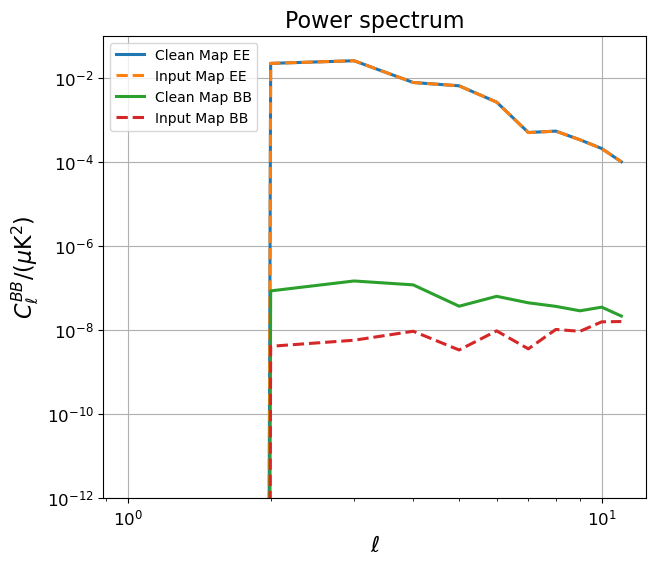

In [22]:
import matplotlib.pyplot as plt

#plot#
fig = plt.figure(figsize=(7, 6))

plt.loglog(l, Clean_map_cl[1] , lw = 2.2, label="Clean Map EE")
plt.loglog(l, Input_map_cl[1], lw=2.2, linestyle='dashed', label="Input Map EE")

np.save("cl_file/Clean_cl_s1_EE.npy", Clean_map_cl[1])
np.save("cl_file/Input_cl_s1_EE.npy", Clean_map_cl[1])


plt.loglog(l, Clean_map_cl[2] , lw = 2.2, label="Clean Map BB")
plt.loglog(l, Input_map_cl[2], lw = 2.2, linestyle='dashed', label="Input Map BB")

np.save("cl_file/Clean_cl_s1_BB.npy", Clean_map_cl[2])
np.save("cl_file/Input_cl_s1_BB.npy", Input_map_cl[2])


plt.ylabel(r'$C_\ell^{BB}/ (\mu{\rm K}^2)$', fontsize=16)
plt.xlabel(r'$\ell$', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(10**-12, 10**-1)

plt.title("Power spectrum", fontsize=16)

plt.grid()
plt.legend()

#plt.savefig('Power_spectrum.png', bbox_inches='tight')
plt.show()

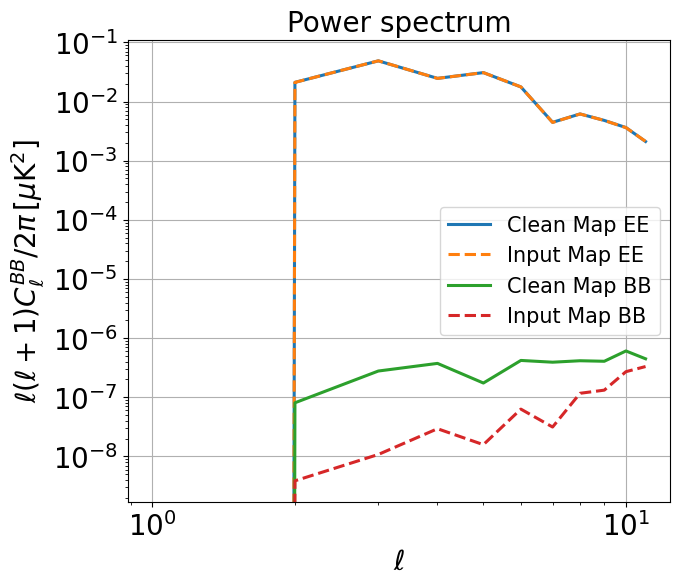

In [37]:
import matplotlib.pyplot as plt

#plot#
fig = plt.figure(figsize=(7, 6))

plt.loglog(l, Clean_map_dl[1] , lw = 2.2, label="Clean Map EE")
plt.loglog(l, Input_map_dl[1], lw=2.2, linestyle='dashed', label="Input Map EE")
np.save("dl_file/Clean_dl_s1_EE.npy", Clean_map_dl[1])
np.save("dl_file/Input_dl_s1_EE.npy", Clean_map_dl[1])


plt.loglog(l, Clean_map_dl[2] , lw = 2.2, label="Clean Map BB")
plt.loglog(l, Input_map_dl[2], lw = 2.2, linestyle='dashed', label="Input Map BB")
np.save("dl_file/Clean_dl_s1_BB.npy", Clean_map_dl[2])
np.save("dl_file/Input_dl_s1_BB.npy", Input_map_dl[2])


plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi\,[\mu {\rm K}^2]$', fontsize=20)
plt.xlabel(r'$\ell$', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ylim(10**-12, 10**-0)

plt.title("Power spectrum" , fontsize=20)

plt.grid()
plt.legend(fontsize=15)

#plt.savefig('Power_spectrum.png', bbox_inches='tight')
plt.show()

[ 0.00000000e+00  0.00000000e+00  1.36806902e-05 -3.09528729e-05
  8.69350136e-06  4.91058925e-06 -4.78064442e-06  2.16958009e-06
  9.40529039e-07  2.34538419e-07  6.45884874e-07 -5.34788345e-07]


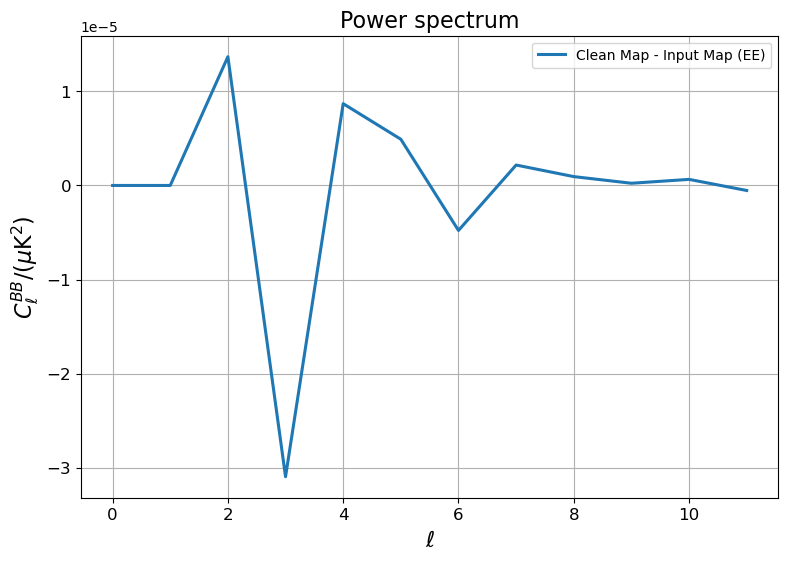

In [24]:
import matplotlib.pyplot as plt

#plot#
fig = plt.figure(figsize=(9, 6))

plt.plot(l, Clean_map_cl[1] - Input_map_cl[1] , lw = 2.2, label="Clean Map - Input Map (EE)")

print(Clean_map_cl[1] - Input_map_cl[1])

plt.ylabel(r'$C_\ell^{BB}/ (\mu{\rm K}^2)$', fontsize=16)
plt.xlabel(r'$\ell$', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.title("Power spectrum", fontsize=16)

plt.grid()
plt.legend()

#plt.savefig('diff.png', bbox_inches='tight')
plt.show()

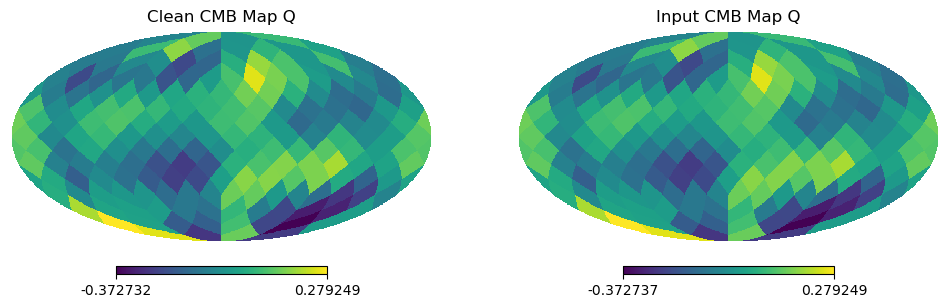

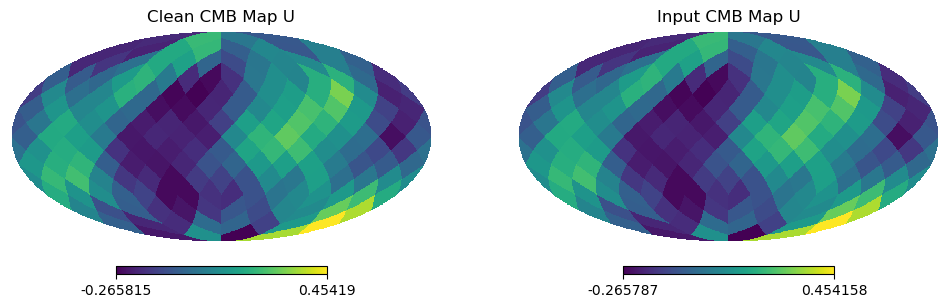

In [25]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(CMB_map_Q, title="Clean CMB Map Q", hold=True)

plt.axes(ax2)
hp.mollview(map_CMB_140GHz[1], title="Input CMB Map Q", hold=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(CMB_map_U, title="Clean CMB Map U",hold=True)

plt.axes(ax2)
hp.mollview(map_CMB_140GHz[2], title="Input CMB Map U",hold=True)

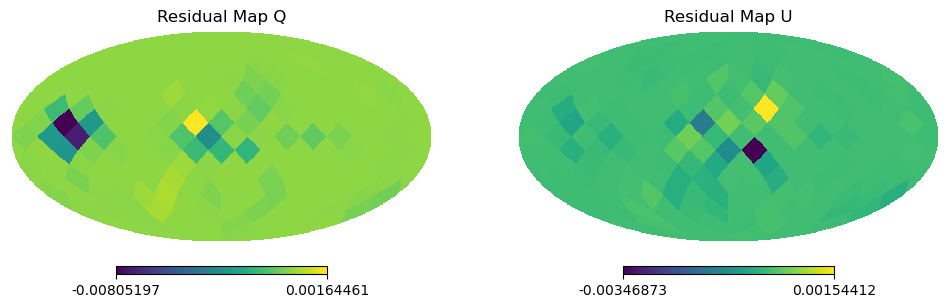

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(map_CMB_140GHz[1] - CMB_map_Q, title="Residual Map Q", hold=True)

plt.axes(ax2)
hp.mollview(map_CMB_140GHz[2] - CMB_map_U, title="Residual Map U", hold=True)

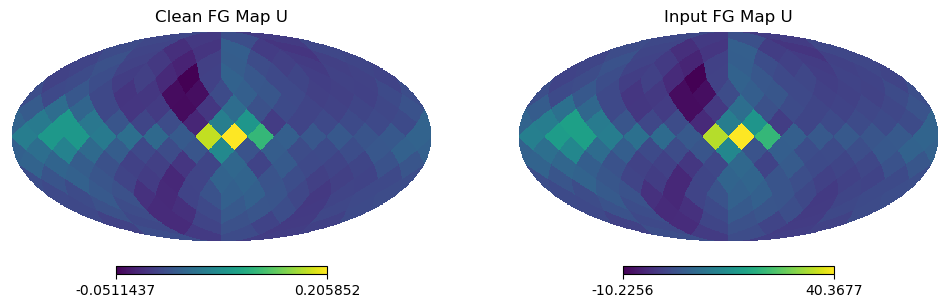

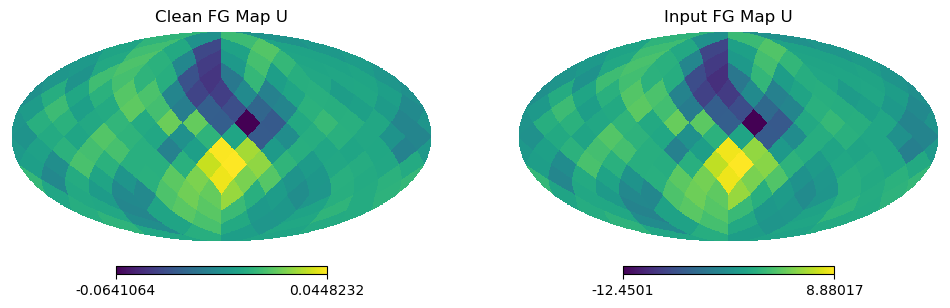

In [27]:
# FG Map

FG_map_Q = clean_map[N_pix*2:N_pix*3]
FG_map_U = clean_map[N_pix*3:N_pix*4]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(FG_map_Q, title="Clean FG Map U",hold=True)

plt.axes(ax2)
hp.mollview(map_Synch_40GHz[1], title="Input FG Map U",hold=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(FG_map_U, title="Clean FG Map U",hold=True)

plt.axes(ax2)
hp.mollview(map_Synch_40GHz[2], title="Input FG Map U",hold=True)

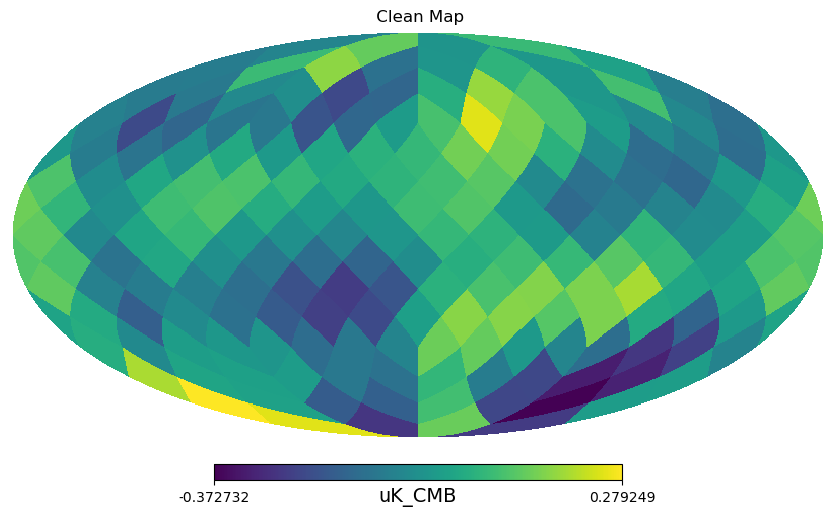

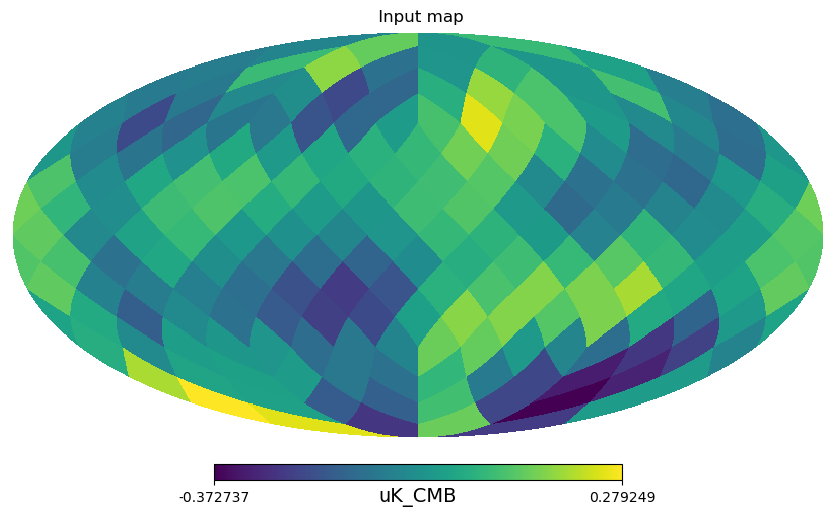

In [28]:
hp.mollview(CMB_map_Q, title=" Clean Map", unit = map_CMB_140GHz.unit)
hp.mollview(map_CMB_140GHz[1], title=" Input map", unit = map_CMB_140GHz.unit)

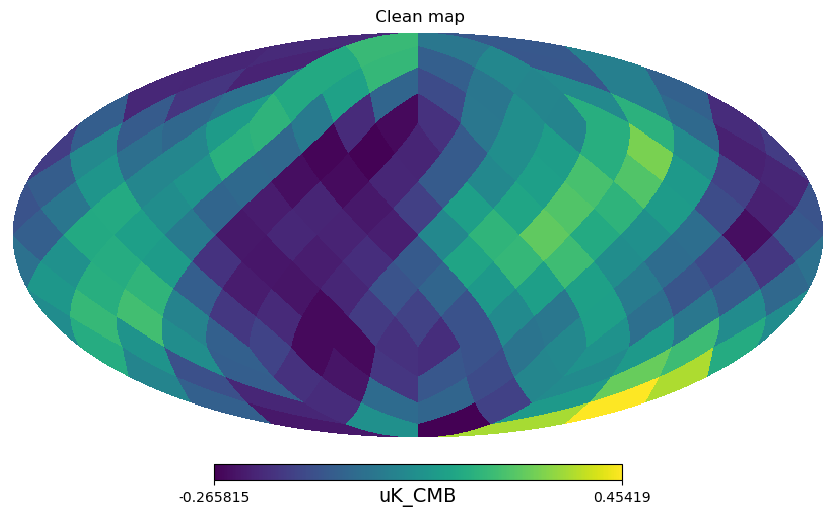

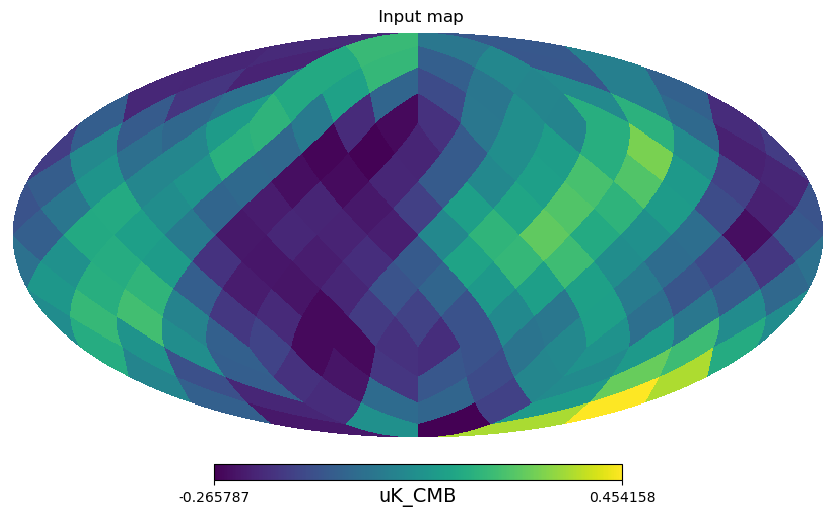

In [29]:
hp.mollview(CMB_map_U, title=" Clean map", unit = map_CMB_140GHz.unit)
hp.mollview(map_CMB_140GHz[2], title=" Input map", unit = map_CMB_140GHz.unit)

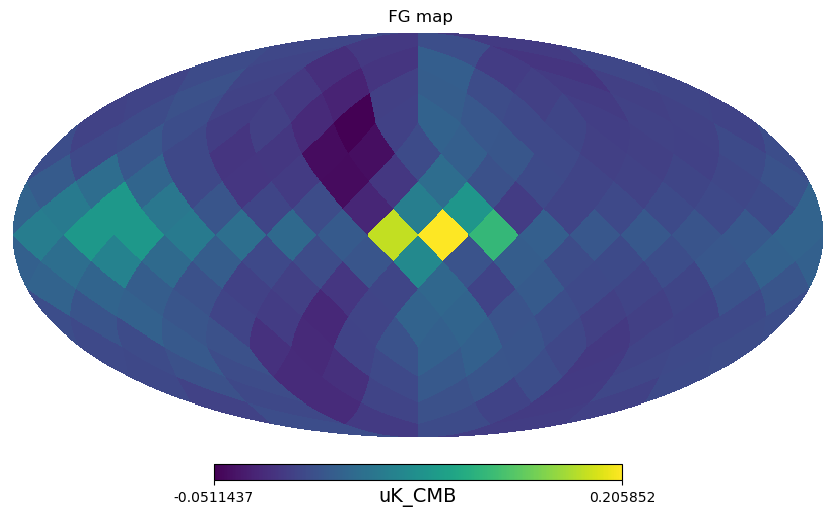

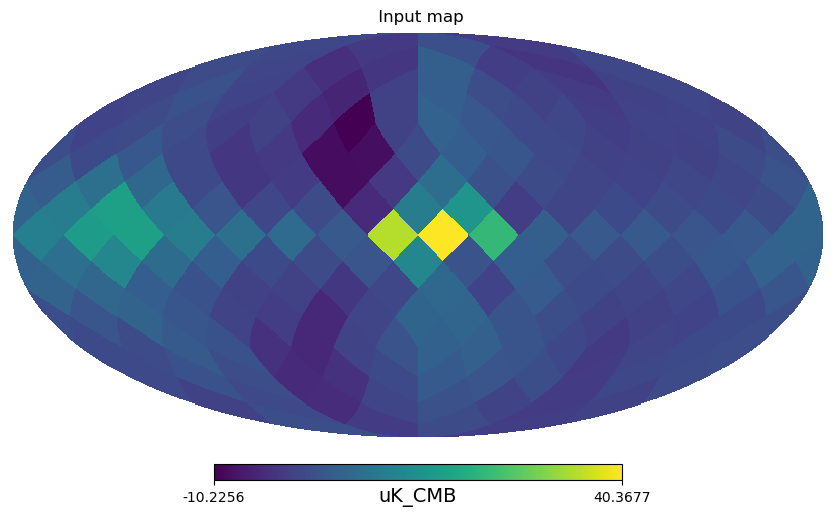

In [30]:
FG_map_Q = clean_map[N_pix*2:N_pix*3]
FG_map_U = clean_map[N_pix*3:N_pix*4]

hp.mollview(FG_map_Q, title=" FG map", unit = map_Synch_40GHz.unit)
hp.mollview(map_Synch_40GHz[1], title=" Input map", unit = map_Synch_40GHz.unit)

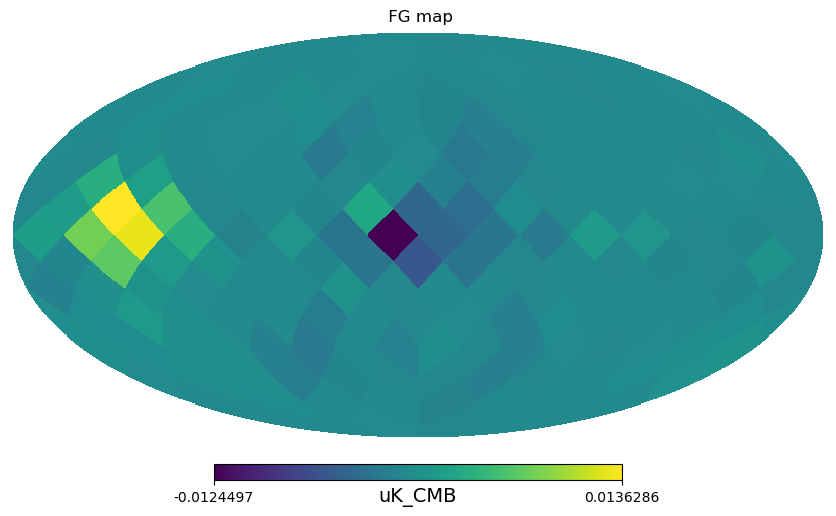

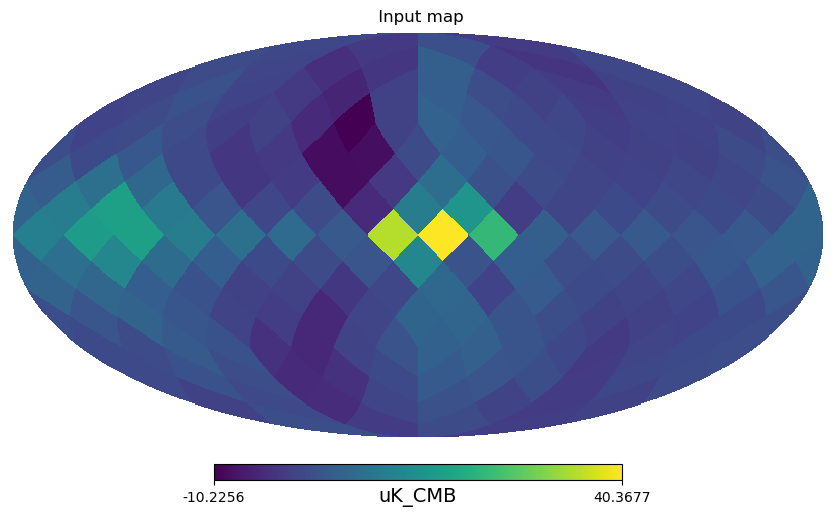

In [31]:
FG_map_Q = clean_map[N_pix*4:N_pix*5]
FG_map_U = clean_map[N_pix*5:N_pix*6]

hp.mollview(FG_map_Q, title=" FG map", unit = map_Synch_40GHz.unit)
hp.mollview(map_Synch_40GHz[1], title=" Input map", unit = map_Synch_40GHz.unit)